# using bigrams and trigrams in Language Models


In [1]:
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import brown

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

## About the dataset brown

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on

    ID	File	Genre	Description
    A16	ca16	news	Chicago Tribune: Society Reportage
    B02	cb02	editorial	Christian Science Monitor: Editorials
    C17	cc17	reviews	Time Magazine: Reviews
    D12	cd12	religion	Underwood: Probing the Ethics of Realtors
    E36	ce36	hobbies	Norling: Renting a Car in Europe
    F25	cf25	lore	Boroff: Jewish Teenage Culture
    G22	cg22	belles_lettres	Reiner: Coping with Runaway Technology
    H15	ch15	government	US Office of Civil and Defence Mobilization: The Family Fallout Shelter
    J17	cj19	learned	Mosteller: Probability with Statistical Applications
    K04	ck04	fiction	W.E.B. Du Bois: Worlds of Color
    L13	cl13	mystery	Hitchens: Footsteps in the Night
    M01	cm01	science_fiction	Heinlein: Stranger in a Strange Land
    N14	cn15	adventure	Field: Rattlesnake Ridge
    P12	cp12	romance	Callaghan: A Passion in Rome
    R06	cr06	humor	Thurber: The Future, If Any, of Comedy

### Using brown corpus

In [2]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [3]:
print(brown.words(categories='news'))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [4]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [5]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

## Python generators

If you’ve never encountered a generator before, the most common real-life example of a generator is a backup generator, which creates — generates — electricity for your house or office. 

Conceptually, Python generators generate values one at a time from a given sequence, instead of giving the entirety of the sequence at once.

2 ways to create generators:-

- A generator function versus a regular function
- A generator expression versus a list comprehension

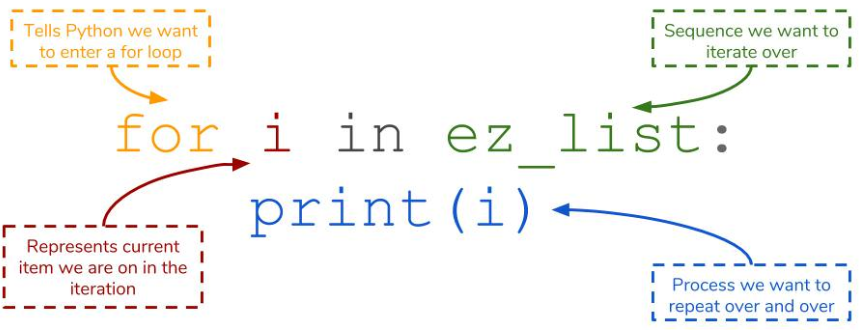

Basics of iteration -
- each of the items in the sequence in the order they appear. using a loop construct
- We refer to any object that can support iteration as an __iterable__.

lists, strings and dictionaries all follow the Iterator Protocol (not integer)

In [9]:
# Iterating over a list
ez_list = [1, 2, 3]

for i in ez_list:
    print(i)

1
2
3


In [10]:
# Iterating over a string
ez_string = "Generators"

for s in ez_string:
    print(s)

G
e
n
e
r
a
t
o
r
s


In [11]:
# Iterating over a dictionary
ez_dict = {1 : "First", 2 : "Second"}
           
for key, value in ez_dict.items():
    print(key, value)

1 First
2 Second


### The generator function
A generator function is just like a regular function but with a key difference: the __yield__ keyword replaces __return__.

In [12]:
# Regular function
def function_a():
    return "a"

# Generator function
def generator_a():
    yield "a"

In [13]:
print(function_a())
print(generator_a())

a
<generator object generator_a at 0x0000025595A3C4F8>


Calling a __regular function__ tells Python to go back to where the function is located in our code, perform the code within the block, and return the result. 

In order to get the __generator function__ to yield its values, you need to pass it into the __next()__ function. 

__next()__ is a special function that asks, “What’s the next item in the iteration?” 



In [14]:
a = generator_a()

In [15]:
# Asking the generator what the next item is
next(a)

'a'

In [181]:
# Do not do this
# next(a)

If we keep going past, we’ll be given a __StopIteration__ error to tell us that the generator has no more values to give. 

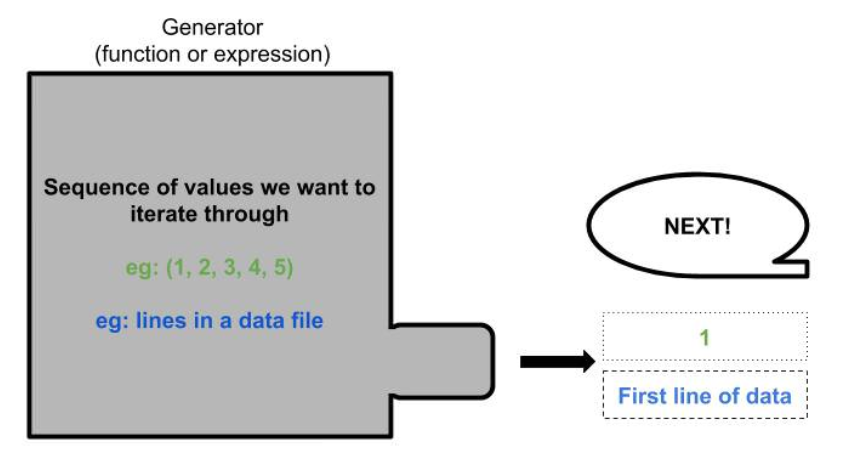

#### Motivation for using Generators 

generators are incredibly __memory efficient__, which makes it a perfect candidate for reading and using Big Data files. 

Once we ask for the __next__ value of a generator, the __old value is discarded__. 

Once we go through the entire generator, it is also discarded from memory as well.

#### Example - reading a file, row by row

In [16]:
# Creating a generator that will generate the data row by row
def beerDataGenerator():
    file = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\recipeData.csv"
    
    for row in open(file, encoding="ISO-8859-1"):
        yield row

In [17]:
beer = beerDataGenerator()

In [18]:
next(beer)

'BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId\n'

#### Example 

In [19]:
# city names generator
def city_name_generator():
    yield("Bangalore")
    yield("Kolkata")
    yield("Delhi")
    yield("Mumbai")

In [20]:
city = city_name_generator()

In [21]:
print(next(city))
print(next(city))
print(next(city))
print(next(city))

Bangalore
Kolkata
Delhi
Mumbai


In [22]:
print(next(city))

StopIteration: 

#### Example

In [23]:
def squares(n=10):
    
    print('Generating squares from 1 to {0}'.format(n ** 2))
    
    for i in range(1, n + 1):
        yield i ** 2

In [24]:
sq = squares(5)

In [25]:
sq

<generator object squares at 0x0000025595AB74F8>

In [26]:
print(next(sq))
print(next(sq))
print(next(sq))

Generating squares from 1 to 25
1
4
9


... BACK TO THE CODE

## nltk.FreqDist() 
is like a dictionary, but it is ordered by frequency. Also, nltk automatically fills the dictionary with counts when given a list of words.

#### Example

In [6]:
import json

from nltk.probability import FreqDist
from nltk.tokenize    import word_tokenize

#### Ex

In [7]:
fdist = FreqDist()

In [8]:
fdist['A'] = 10

In [9]:
print(list(fdist.keys()), list(fdist.values()))
print (json.dumps(fdist, sort_keys=True, indent=4))

['A'] [10]
{
    "A": 10
}


In [10]:
fdist['B'] = 20

In [11]:
fdist['A'] = 11

In [12]:
fdist['A'] += 1

#### Ex

In [13]:
sent = 'This is an example sentence, great sentence is always an ideal example'

In [75]:
fdist = FreqDist()

In [14]:
for word in word_tokenize(sent):
    fdist[word.lower()] += 1

In [15]:
list(fdist.keys())

['A',
 'B',
 'this',
 'is',
 'an',
 'example',
 'sentence',
 ',',
 'great',
 'always',
 'ideal']

In [16]:
list(fdist.values())

[12, 20, 1, 2, 2, 2, 2, 1, 1, 1, 1]

In [17]:
print (json.dumps(fdist, sort_keys=True, indent=4))

{
    ",": 1,
    "A": 12,
    "B": 20,
    "always": 1,
    "an": 2,
    "example": 2,
    "great": 1,
    "ideal": 1,
    "is": 2,
    "sentence": 2,
    "this": 1
}


displays the most used words in the text. So if you want the ten most used words in the text, 

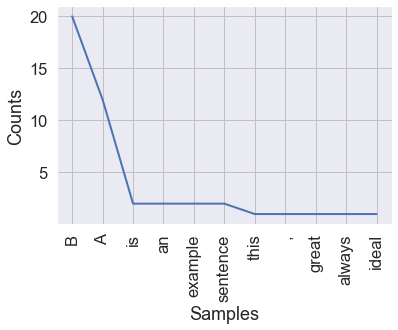

In [18]:
fdist.plot(20);

... BACK TO THE CODE

In [21]:
%%time
len(brown.words())

Wall time: 3.9 s


1161192

In [22]:
%%time
freq_brown = nltk.FreqDist(brown.words())

Wall time: 4.91 s


In [23]:
list(freq_brown.keys())[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [24]:
list(freq_brown.values())[:10]

[7258, 17, 85, 18, 4, 1943, 60, 3542, 43, 36080]

In [25]:
freq_brown.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

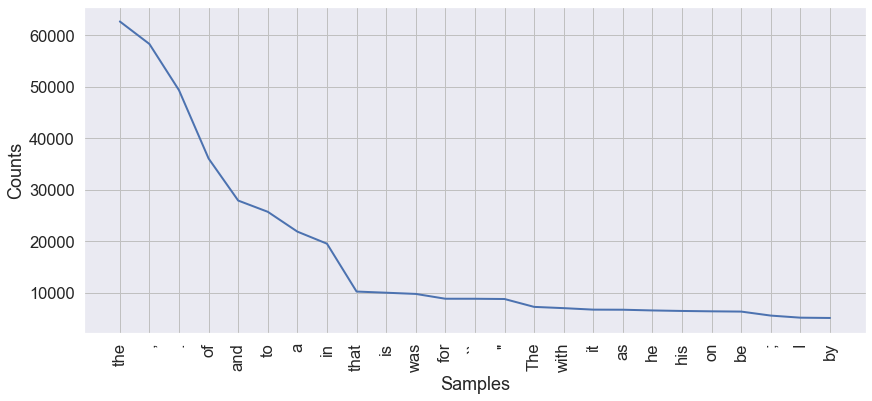

In [26]:
plt.figure(figsize=(14, 6))
freq_brown.plot(25);

## nltk.ConditionalFreqDist() counts frequencies of pairs.

When given a list of bigrams, it maps each first word of a bigram to a FreqDist over the second words of the bigram.

#### Example

In [27]:
from nltk.probability import ConditionalFreqDist

In [28]:
sent = "the the the dog dog some other words that we do not care about"

In [29]:
# Create a reference variable for Class SExprTokenizer 
cfdist = ConditionalFreqDist() 

code will produce a conditional frequency distribution that encodes how often each word type occurs, given the length of that word type:

In [30]:
for word in word_tokenize(sent): 
    condition = len(word) 
    
    cfdist[condition][word] += 1

In [31]:
cfdist.keys()

dict_keys([3, 4, 5, 2])

In [32]:
cfdist.values()

dict_values([FreqDist({'the': 3, 'dog': 2, 'not': 1}), FreqDist({'some': 1, 'that': 1, 'care': 1}), FreqDist({'other': 1, 'words': 1, 'about': 1}), FreqDist({'we': 1, 'do': 1})])

In [33]:
cfdist[2]

FreqDist({'we': 1, 'do': 1})

In [34]:
print (json.dumps(cfdist, sort_keys=True, indent=4))

{
    "2": {
        "do": 1,
        "we": 1
    },
    "3": {
        "dog": 2,
        "not": 1,
        "the": 3
    },
    "4": {
        "care": 1,
        "some": 1,
        "that": 1
    },
    "5": {
        "about": 1,
        "other": 1,
        "words": 1
    }
}


... BACK TO THE CODE

In [35]:
list(nltk.ngrams([1,2,3,4,5], 2))

[(1, 2), (2, 3), (3, 4), (4, 5)]

In [36]:
list(nltk.ngrams(word_tokenize('Hello I work at popcorn-ai'), 2))

[('Hello', 'I'), ('I', 'work'), ('work', 'at'), ('at', 'popcorn-ai')]

In [37]:
list(nltk.bigrams(word_tokenize('Hello I work at popcorn-ai')))

[('Hello', 'I'), ('I', 'work'), ('work', 'at'), ('at', 'popcorn-ai')]

In [38]:
list(nltk.trigrams(word_tokenize('Hello I work at popcorn-ai')))

[('Hello', 'I', 'work'), ('I', 'work', 'at'), ('work', 'at', 'popcorn-ai')]

So ...

let us get the bigrams into the conditional freq distribution

In [39]:
cfdist = nltk.ConditionalFreqDist(nltk.bigrams(word_tokenize('Hello I work at popcorn-ai')))

In [40]:
print (json.dumps(cfdist, sort_keys=True, indent=4))

{
    "Hello": {
        "I": 1
    },
    "I": {
        "work": 1
    },
    "at": {
        "popcorn-ai": 1
    },
    "work": {
        "at": 1
    }
}


In [41]:
cfdist = nltk.ConditionalFreqDist(nltk.bigrams(word_tokenize('Hello, I work at popcorn-ai. Hello friends! I like to work')))
print (json.dumps(cfdist, sort_keys=True, indent=4))

{
    "!": {
        "I": 1
    },
    ",": {
        "I": 1
    },
    ".": {
        "Hello": 1
    },
    "Hello": {
        ",": 1,
        "friends": 1
    },
    "I": {
        "like": 1,
        "work": 1
    },
    "at": {
        "popcorn-ai": 1
    },
    "friends": {
        "!": 1
    },
    "like": {
        "to": 1
    },
    "popcorn-ai": {
        ".": 1
    },
    "to": {
        "work": 1
    },
    "work": {
        "at": 1
    }
}


In [42]:
cfdist = nltk.ConditionalFreqDist(nltk.bigrams(word_tokenize('one fish two fish red fish blue fish')))
print (json.dumps(cfdist, sort_keys=True, indent=4))

{
    "blue": {
        "fish": 1
    },
    "fish": {
        "blue": 1,
        "red": 1,
        "two": 1
    },
    "one": {
        "fish": 1
    },
    "red": {
        "fish": 1
    },
    "two": {
        "fish": 1
    }
}


In [43]:
cfreq_brown_2gram = nltk.ConditionalFreqDist(nltk.bigrams(brown.words()))

In [44]:
list(cfreq_brown_2gram.keys())[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [45]:
list(cfreq_brown_2gram.values())[:5]

[FreqDist({'first': 96, 'only': 55, 'man': 48, 'new': 41, 'most': 41, '``': 38, 'second': 37, 'two': 37, 'New': 32, 'other': 31, ...}),
 FreqDist({'County': 6, 'Superior': 2, 'legislators': 2, 'taxpayers': 1, "ordinary's": 1, 'Tax': 1, 'Health': 1, 'to': 1, 'was': 1, ',': 1}),
 FreqDist({',': 19, '.': 6, 'and': 4, 'Jail': 2, 'is': 2, 'Commissioners': 2, 'cannery': 2, 'Grand': 1, 'purchasing': 1, 'general': 1, ...}),
 FreqDist({'Jury': 2, 'Canyon': 2, 'Ledge': 1, 'Ballroom': 1, 'Dukes': 1, 'Prix': 1, 'Monarque': 1, 'occupy': 1, 'Guignol': 1, 'Isle': 1, ...}),
 FreqDist({'said': 1, 'indictments': 1, '.': 1, ',': 1})]

conditions() in a ConditionalFreqDist are like keys() in a dictionary

In [46]:
cfreq_brown_2gram.conditions()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [47]:
# the cfreq_brown_2gram entry for "my" is a FreqDist.
cfreq_brown_2gram["my"]

FreqDist({'own': 52, 'hand': 19, 'life': 19, 'mind': 19, 'first': 15, 'wife': 14, 'hands': 14, 'eyes': 13, 'father': 13, 'mother': 12, ...})

In [48]:
len(cfreq_brown_2gram["my"])

635

here are the words that can follow after "my". 

We first access the FreqDist associated with "my", then the keys in that FreqDist

In [159]:
len(cfreq_brown_2gram["my"].keys())

635

In [160]:
# cfreq_brown_2gram["my"].keys()

here are the 20 most frequent words to come after "my", with their frequencies

In [49]:
cfreq_brown_2gram["my"].most_common(20)

[('own', 52),
 ('hand', 19),
 ('life', 19),
 ('mind', 19),
 ('first', 15),
 ('wife', 14),
 ('hands', 14),
 ('eyes', 13),
 ('father', 13),
 ('mother', 12),
 ('husband', 12),
 ('way', 12),
 ('head', 11),
 ('left', 8),
 ('heart', 7),
 ('point', 7),
 ('body', 7),
 ('Uncle', 7),
 ('best', 6),
 ('family', 6)]

## nltk.ConditionalProbDist

The ProbDist factory is a function that takes a condition's frequency distribution, and returns its probability distribution. A ProbDist class's name (such as MLEProbDist or HeldoutProbDist) can be used to specify that class's constructor.

In [50]:
from nltk.probability import ConditionalFreqDist
from nltk.probability import ConditionalProbDist, ELEProbDist

#### Ex

In [51]:
corpus = u"<s> bangalore roads bangalore weather roads narrow traffic roads bad quality bangalore roads </s>".split()
corpus

['<s>',
 'bangalore',
 'roads',
 'bangalore',
 'weather',
 'roads',
 'narrow',
 'traffic',
 'roads',
 'bad',
 'quality',
 'bangalore',
 'roads',
 '</s>']

In [52]:
sentence = u"<s> bangalore weather roads narrow traffic </s>".split()

In [53]:
set(corpus)

{'</s>',
 '<s>',
 'bad',
 'bangalore',
 'narrow',
 'quality',
 'roads',
 'traffic',
 'weather'}

In [215]:
vocabulary = set(corpus)
len(vocabulary)

9

In [54]:
cfd = nltk.ConditionalFreqDist(nltk.bigrams(corpus))

In [55]:
list(nltk.bigrams(corpus))

[('<s>', 'bangalore'),
 ('bangalore', 'roads'),
 ('roads', 'bangalore'),
 ('bangalore', 'weather'),
 ('weather', 'roads'),
 ('roads', 'narrow'),
 ('narrow', 'traffic'),
 ('traffic', 'roads'),
 ('roads', 'bad'),
 ('bad', 'quality'),
 ('quality', 'bangalore'),
 ('bangalore', 'roads'),
 ('roads', '</s>')]

In [56]:
print (json.dumps(cfd, sort_keys=True, indent=4))

{
    "<s>": {
        "bangalore": 1
    },
    "bad": {
        "quality": 1
    },
    "bangalore": {
        "roads": 2,
        "weather": 1
    },
    "narrow": {
        "traffic": 1
    },
    "quality": {
        "bangalore": 1
    },
    "roads": {
        "</s>": 1,
        "bad": 1,
        "bangalore": 1,
        "narrow": 1
    },
    "traffic": {
        "roads": 1
    },
    "weather": {
        "roads": 1
    }
}


In [218]:
# the corpus counts of each bigram in the sentence:
[cfd[a][b] for (a, b) in nltk.bigrams(sentence)]

[1, 1, 1, 1, 1, 0]

In [220]:
list(nltk.bigrams(sentence))

[('<s>', 'bangalore'),
 ('bangalore', 'weather'),
 ('weather', 'roads'),
 ('roads', 'narrow'),
 ('narrow', 'traffic'),
 ('traffic', '</s>')]

In [221]:
# The counts for each word in the sentence:
[cfd[a].N() for (a, b) in nltk.bigrams(sentence)]

[1, 3, 1, 4, 1, 1]

In [223]:
# The MLE probability for each bigram:
[1.0 * cfd[a][b] / cfd[a].N() for (a, b) in nltk.bigrams(sentence)]

[1.0, 0.3333333333333333, 1.0, 0.25, 1.0, 0.0]

.. back to the main code

In [57]:
cprob_brown_2gram = ConditionalProbDist(cfreq_brown_2gram, nltk.MLEProbDist)

This again has conditions() wihch are like dictionary keys

In [58]:
cprob_brown_2gram.conditions()[:5]

['The', 'Fulton', 'County', 'Grand', 'Jury']

Here is what we find for "my": a Maximum Likelihood Estimation-based probability distribution,
as a MLEProbDist object. -->

In [59]:
cprob_brown_2gram["my"]

<MLEProbDist based on 1161 samples>

We can find the words that can come after "my" by using the function samples()

In [60]:
cprob_brown_2gram["my"].samples()

dict_keys(['political', 'client', 'fellow', 'man', 'candidacy', 'best', 'place-kicking', 'last', 'reflexes', 'jobs', 'family', 'thanks', 'firm', 'payroll', 'judgment', 'sales', 'first', 'mother', 'boys', 'share', 'daily', 'wife', 'legs', 'big', 'hands', 'biologist', 'locker', 'hand', 'right', 'neck', 'heart', 'grudge', 'neighbor', 'brother', 'house', 'good', 'life', 'native', 'charge-a-plate', "son's", 'psychiatrist', 'son', 'children', 'arms', 'daughter', 'opinion', 'husband', 'friends', 'country', 'wonderful', 'school', 'home', 'desire', 'point', 'little', 'part', 'two', 'itinerary', 'classroom', 'initial', 'induction', 'own', 'students', 'classes', 'personal', 'only', 'estimation', 'taste', 'objectivity', 'bed', 'eyes', 'principal', 'primary', 'Roman', 'experience', 'stay', 'lot', 'leave', 'learned', 'Bible', 'nearest', 'Father', 'Saviour', 'patient', 'peace', 'work', 'patients', 'professional', 'talents', 'soul', 'light', 'salvation', 'foes', 'flesh', 'fingers', 'body', 'finger', '

In [61]:
# Here is the probability of a particular pair:
cprob_brown_2gram["my"].prob("own")

0.04478897502153316

## Unigram model

We can also compute unigram probabilities (probabilities of individual words)

In [231]:
freq_brown_1gram = nltk.FreqDist(brown.words())

In [232]:
len_brown = len(brown.words())

In [233]:
def unigram_prob(word):
    return freq_brown_1gram[ word] / len_brown

## Example problem

The contents of cprob_brown_2gram, all these probabilities, now form a __trained bigram__ language model. 

The typical use for a __language model__ is to ask it for the probabillity of a word sequence

> P(how do you do) = P(how) * P(do|how) * P(you|do) * P(do | you)

In [234]:
prob_sentence = unigram_prob("how") * \
                    cprob_brown_2gram["how"].prob("do") * \
                    cprob_brown_2gram["do"].prob("you") * \
                    cprob_brown_2gram["you"].prob("do")

prob_sentence

1.5639033871961e-09

## Method 2

let the LM generate text at random

In [235]:
cprob_brown_2gram["my"].generate()

'life'

In [236]:
corpus = """<s> I am Sam </s>
<s> Sam I am </s>
<s> I do not like green eggs and ham </s>"""

In [237]:
words = corpus.split()
words 

['<s>',
 'I',
 'am',
 'Sam',
 '</s>',
 '<s>',
 'Sam',
 'I',
 'am',
 '</s>',
 '<s>',
 'I',
 'do',
 'not',
 'like',
 'green',
 'eggs',
 'and',
 'ham',
 '</s>']

In [238]:
cfreq_sam = nltk.ConditionalFreqDist(nltk.bigrams(words))
cprob_sam = nltk.ConditionalProbDist(cfreq_sam, nltk.MLEProbDist)

In [239]:
word = "<s>"

for index in range(50):
    word = cprob_sam[ word].generate()
    
    print(word, end = " ")

I do not like green eggs and ham </s> <s> Sam </s> <s> I am Sam I do not like green eggs and ham </s> <s> I am </s> <s> Sam I am Sam </s> <s> Sam </s> <s> I am Sam </s> <s> I do not like green eggs 

### Let us use brown corpus

In [240]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [256]:
print(brown.fileids())

['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17', 'ce01', 'ce02', 'ce03', 'ce04', 'ce05', 'ce06', 'ce07', 'ce08', 'ce09', 'ce10', 'ce11', 'ce12', 'ce13', 'ce14', 'ce15', 'ce16', 'ce17', 'ce18', 'ce19', 'ce20',

In [261]:
# Let's try Science Fiction.
cfreq_scifi = nltk.ConditionalFreqDist(nltk.bigrams(brown.words(categories = "science_fiction")))
cprob_scifi = nltk.ConditionalProbDist(cfreq_scifi, nltk.MLEProbDist)

In [263]:
word = "in"
for index in range(50):
    word = cprob_scifi[ word ].generate()
    
    print(word, end = " -> ")

principle -> that -> stupid -> jackass -> until -> you -> my -> lessons -> have -> blushed -> , -> said -> sharply -> . -> `` -> Don't -> bother -> '' -> . -> Plus -> the -> next -> ship -> of -> regular -> , -> Jack -> crawled -> under -> one-gee -> deceleration -> . -> `` -> Hal -> doubted -> if -> Anne -> were -> three -> other -> gases -> long -> it -> was -> spent -> on -> a -> student -> telling -> you -> 